In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import random as rnd
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [86]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [17]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [22]:
train[['Fare','Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
...,...,...
243,227.5250,0.750000
244,247.5208,0.500000
245,262.3750,1.000000
246,263.0000,0.500000


In [23]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [39]:
train[['Pclass','Age']].groupby(['Pclass'],as_index=False).median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [40]:
#train['Age'].fillna(value=)

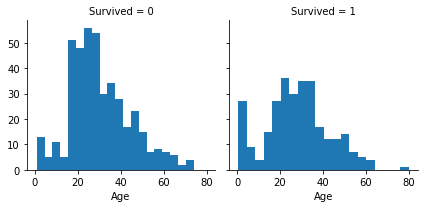

In [24]:
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Age', bins=20)

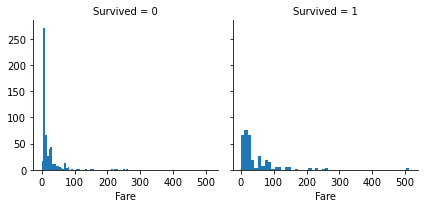

In [36]:
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Fare', bins=50)

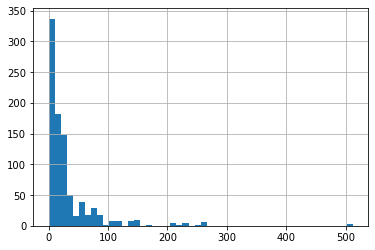

In [27]:
train['Fare'].hist(bins=50)

In [87]:
bins= [0,2,4,13,20,30,40,50,60,70,100]
labels = ['0-1','2-3','4-12','13-19','20-29','30-39','40-49','50-59','60-69','70+']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

In [33]:
train[['Age', 'AgeGroup']]

,Age,AgeGroup
0,22.0,20-29
1,38.0,30-39
2,26.0,20-29
3,35.0,30-39
4,35.0,30-39
...,...,...
886,27.0,20-29
887,19.0,13-19
888,NaN,NaN
889,26.0,20-29


In [88]:
bins= [0,26,51,101,151,1000]
labels = ['0-25','26-50','51-100','101-150','150+']
train['FareGroup'] = pd.cut(train['Fare'], bins=bins, labels=labels, right=False)
test['FareGroup'] = pd.cut(train['Fare'], bins=bins, labels=labels, right=False)

In [38]:
train[['Fare','FareGroup']]

,Fare,FareGroup
0,7.2500,0-25
1,71.2833,51-100
2,7.9250,0-25
3,53.1000,51-100
4,8.0500,0-25
...,...,...
886,13.0000,0-25
887,30.0000,26-50
888,23.4500,0-25
889,30.0000,26-50


In [89]:
train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [44]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup
0,0,3,male,22.0,1,0,7.2500,S,20-29,0-25
1,1,1,female,38.0,1,0,71.2833,C,30-39,51-100
2,1,3,female,26.0,0,0,7.9250,S,20-29,0-25
3,1,1,female,35.0,1,0,53.1000,S,30-39,51-100
4,0,3,male,35.0,0,0,8.0500,S,30-39,0-25


In [90]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,20-29,0-25,0.0
1,1,1,female,38.0,1,0,71.2833,C,30-39,51-100,1.0
2,1,3,female,26.0,0,0,7.9250,S,20-29,0-25,0.0
3,1,1,female,35.0,1,0,53.1000,S,30-39,51-100,0.0
4,0,3,male,35.0,0,0,8.0500,S,30-39,0-25,2.0


In [53]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,FamilySize
0,3,male,34.5,0,0,7.8292,Q,20-29,0-25,0
1,3,female,47.0,1,0,7.0000,S,30-39,51-100,1
2,2,male,62.0,0,0,9.6875,Q,20-29,0-25,0
3,3,male,27.0,0,0,8.6625,S,30-39,51-100,0
4,3,female,22.0,1,1,12.2875,S,30-39,0-25,2


In [91]:
train.drop(['Age','SibSp','Parch','Fare'], axis=1, inplace=True)
test.drop(['Age','SibSp','Parch','Fare'], axis=1, inplace=True)

In [56]:
train.head()

,Survived,Pclass,Sex,Embarked,AgeGroup,FareGroup,FamilySize
0,0,3,male,S,20-29,0-25,1
1,1,1,female,C,30-39,51-100,1
2,1,3,female,S,20-29,0-25,0
3,1,1,female,S,30-39,51-100,1
4,0,3,male,S,30-39,0-25,0


In [92]:
train = pd.get_dummies(train, columns=['Sex','Embarked','AgeGroup','FareGroup','FamilySize'])

In [93]:
train.head()

,Survived,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_0-1,AgeGroup_2-3,AgeGroup_4-12,...,FareGroup_150+,FamilySize_0,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_10
0,0,3,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [94]:
test = pd.get_dummies(test, columns=['Sex','Embarked','AgeGroup','FareGroup','FamilySize'])

In [95]:
test.head()

,PassengerId,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_0-1,AgeGroup_2-3,AgeGroup_4-12,...,FareGroup_150+,FamilySize_0,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_10
0,892,3,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,893,3,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,894,2,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,895,3,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,896,3,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [96]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1)

In [97]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [98]:
accuracy_decisiontree = round(model.score(X_train, Y_train) *100, 2)
accuracy_decisiontree

88.66

In [99]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
output.to_csv('Titanic_Predict_Submission.csv', index=False)